In [1]:
!pip install kaggle

In [3]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d datasnaek/chess

  0% 0.00/2.77M [00:00<?, ?B/s]
100% 2.77M/2.77M [00:00<00:00, 163MB/s]


In [6]:
!unzip chess.zip

Archive:  chess.zip
  inflating: games.csv               


Gerado o arquivo games.csv

Descrição geral:

General Info

This is a set of just over 20,000 games collected from a selection of users on the site Lichess.org, and how to collect more. I will also upload more games in the future as I collect them. This set contains the:

Game ID;
Rated (T/F);
Start Time;
End Time;
Number of Turns;
Game Status;
Winner;
Time Increment;
White Player ID;
White Player Rating;
Black Player ID;
Black Player Rating;
All Moves in Standard Chess Notation;
Opening Eco (Standardised Code for any given opening, list here);
Opening Name;
Opening Ply (Number of moves in the opening phase)
For each of these separate games from Lichess. I collected this data using the Lichess API, which enables collection of any given users game history. The difficult part was collecting usernames to use, however the API also enables dumping of all users in a Lichess team. There are several teams on Lichess with over 1,500 players, so this proved an effective way to get users to collect games from.

In [118]:
import polars as pl

In [119]:
df = pl.read_csv("games.csv")

In [120]:
df.head()

id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
str,bool,f64,f64,i64,str,str,str,str,i64,str,i64,str,str,str,i64
"""TZJHLljE""",false,1.5042e12,1.5042e12,13,"""outoftime""","""white""","""15+2""","""bourgris""",1500,"""a-00""",1191,"""d4 d5 c4 c6 cx…","""D10""","""Slav Defense: …",5
"""l1NXvwaE""",true,1.5041e12,1.5041e12,16,"""resign""","""black""","""5+10""","""a-00""",1322,"""skinnerua""",1261,"""d4 Nc6 e4 e5 f…","""B00""","""Nimzowitsch De…",4
"""mIICvQHh""",true,1.5041e12,1.5041e12,61,"""mate""","""white""","""5+10""","""ischia""",1496,"""a-00""",1500,"""e4 e5 d3 d6 Be…","""C20""","""King's Pawn Ga…",3
"""kWKvrqYL""",true,1.5041e12,1.5041e12,61,"""mate""","""white""","""20+0""","""daniamurashov""",1439,"""adivanov2009""",1454,"""d4 d5 Nf3 Bf5 …","""D02""","""Queen's Pawn G…",3
"""9tXo1AUZ""",true,1.5040e12,1.5040e12,95,"""mate""","""white""","""30+3""","""nik221107""",1523,"""adivanov2009""",1469,"""e4 e5 Nf3 d6 d…","""C41""","""Philidor Defen…",5


In [121]:
df = df.drop(['id', 'created_at', 'last_move_at', 'turns', 'victory_status', 'increment_code', 'white_id', 'black_id', 'moves', 'opening_eco', 'opening_name', 'opening_ply'])

In [122]:
df.head(10)

rated,winner,white_rating,black_rating
bool,str,i64,i64
false,"""white""",1500,1191
true,"""black""",1322,1261
true,"""white""",1496,1500
true,"""white""",1439,1454
true,"""white""",1523,1469
false,"""draw""",1250,1002
true,"""white""",1520,1423
false,"""black""",1413,2108
true,"""black""",1439,1392


In [123]:
df.describe()

describe,rated,winner,white_rating,black_rating
str,str,str,f64,f64
"""count""","""20058""","""20058""",20058.0,20058.0
"""null_count""","""0""","""0""",0.0,0.0
"""mean""",null,null,1596.631868,1588.831987
"""std""",null,null,291.253376,291.036126
"""min""","""False""","""black""",784.0,789.0
"""25%""",null,null,1398.0,1391.0
"""50%""",null,null,1567.0,1562.0
"""75%""",null,null,1793.0,1784.0
"""max""","""True""","""white""",2700.0,2723.0


In [124]:
df.sum()

rated,winner,white_rating,black_rating
u32,str,i64,i64
16155,null,32025242,31868792


In [125]:
df.group_by('winner').agg()

winner
str
"""white"""
"""black"""
"""draw"""


In [126]:
# Filter where rated == 'true' and winner != 'draw'

ndf = df.filter((df['rated'] == True) & (df['winner'] != 'draw'))

In [127]:
ndf.describe()

describe,rated,winner,white_rating,black_rating
str,str,str,f64,f64
"""count""","""15436""","""15436""",15436.0,15436.0
"""null_count""","""0""","""0""",0.0,0.0
"""mean""",null,null,1595.242679,1591.263475
"""std""",null,null,283.052895,288.689775
"""min""","""True""","""black""",784.0,789.0
"""25%""",null,null,1394.0,1389.0
"""50%""",null,null,1575.0,1571.0
"""75%""",null,null,1791.0,1788.0
"""max""","""True""","""white""",2622.0,2588.0


In [128]:
ndf = ndf.with_columns(
    pl.when(ndf['winner'] == 'white')
      .then(ndf['white_rating'])
      .otherwise(ndf['black_rating'])
      .alias('winner_rating_value'))

In [129]:
# major_rating_has_won

ndf = ndf.with_columns(
    pl.when((ndf['winner'] == 'white') & (ndf['winner_rating_value'] == ndf['white_rating']))
    .then(True)
    .otherwise(False)
    .alias('major_rating_has_won')
)

In [130]:
ndf = ndf.with_columns(abs(pl.col('white_rating') - pl.col('black_rating')).alias('rating_difference'))

In [131]:
import numpy as np
import matplotlib.pyplot as plt

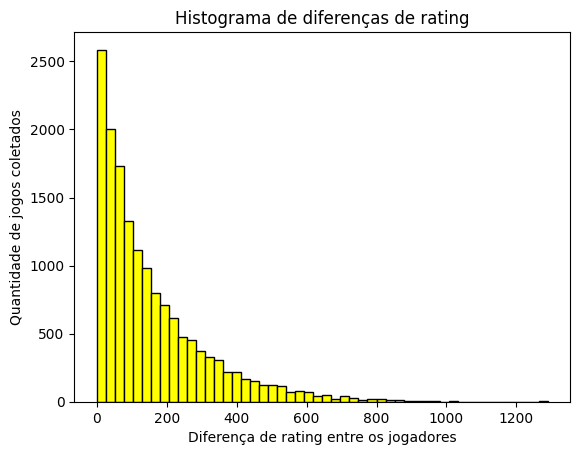

In [132]:
rating_difference_values = ndf['rating_difference'].to_numpy()

# Criar o histograma usando Matplotlib
plt.hist(rating_difference_values, bins=50, color='yellow', edgecolor='black')

# Adicionar rótulos e título
plt.xlabel('Diferença de rating entre os jogadores')
plt.ylabel('Quantidade de jogos coletados')
plt.title ('Histograma de diferenças de rating')

# Exibir o histograma
plt.show()


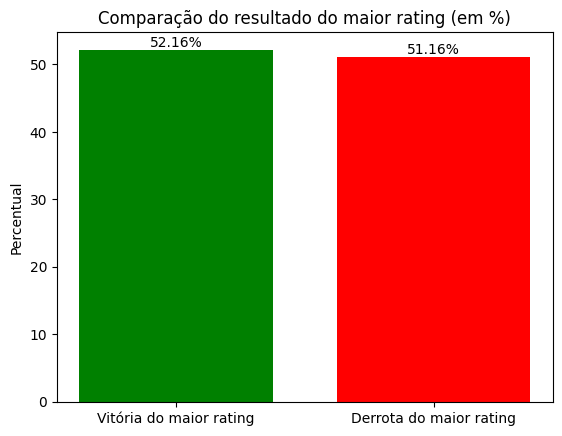

In [165]:
# Total registers
total_registers = ndf.height

# Filter percentual
count_major_rating_won = ndf.filter(ndf['major_rating_has_won'] == True).height
percent_major_rating_won = (count_major_rating_won / total_registers) * 100
percent_major_rating_lost = abs(1 - percent_major_rating_won)

# Criar o gráfico de barras
plt.bar(['Vitória do maior rating', 'Derrota do maior rating'],
        [percent_major_rating_won, percent_major_rating_lost],
        color=['green', 'red'],
        width=0.75)

# Adicionar rótulos e título
plt.ylabel('Percentual')
plt.title('Comparação do resultado do maior rating (em %)')

plt.text(0, percent_major_rating_won, f'{percent_major_rating_won:.2f}%', ha='center', va='bottom')
plt.text(1, percent_major_rating_lost, f'{percent_major_rating_lost:.2f}%', ha='center', va='bottom')

# Exibir o gráfico
plt.show()

total_percent_major_rating_won = percent_major_rating_won

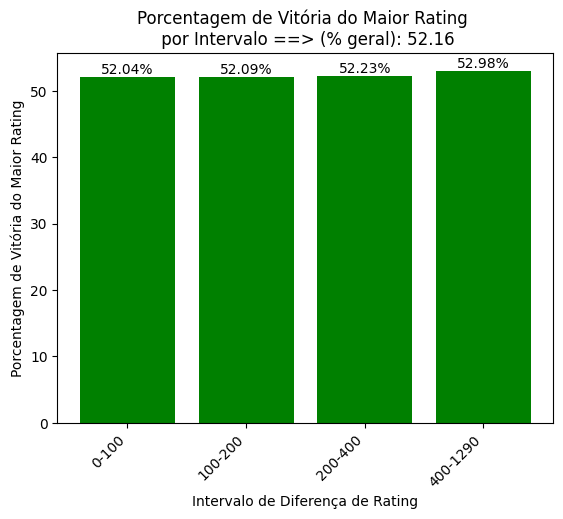

In [166]:
# Inicializar os intervalos de diferença de rating
intervalos = [(0, 100), (100, 200), (200, 400), (400, ndf['rating_difference'].max())]

# Inicializar listas para armazenar as porcentagens de vitória do maior rating em cada intervalo
percentagens_won = []

# Calcular as porcentagens de vitória do maior rating para cada intervalo
for intervalo in intervalos:
    min_diff, max_diff = intervalo

    # Filtrar os dados para o intervalo de diferença de rating
    filtered_df = ndf.filter((ndf['rating_difference'] >= min_diff) & (ndf['rating_difference'] < max_diff))


    # Contar os casos de vitória do maior rating
    count_major_rating_won = filtered_df.filter(filtered_df['major_rating_has_won'] == True).height

    # Calcular a porcentagem de vitória do maior rating
    percent_major_rating_won = (count_major_rating_won / filtered_df.height) * 100

    # Adicionar à lista de porcentagens de vitória
    percentagens_won.append(percent_major_rating_won)

# Preparar os rótulos das barras
labels = [f'{min_diff}-{max_diff}' for min_diff, max_diff in intervalos]

# Criar o gráfico de barras
plt.bar(labels, percentagens_won, color='green')

# Adicionar rótulos e título
plt.xlabel('Intervalo de Diferença de Rating')
plt.ylabel('Porcentagem de Vitória do Maior Rating')
plt.title('Porcentagem de Vitória do Maior Rating \n por Intervalo ==> (% geral): ' + str(total_percent_major_rating_won)[:5])

for i, percentagem in enumerate(percentagens_won):
    plt.text(i, percentagem, f'{percentagem:.2f}%', ha='center', va='bottom')

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Exibir o gráfico
plt.show()


In [172]:
df_70_percent = ndf.sample(fraction=0.7, shuffle=True)
df_30_percent = ndf.sample(fraction=0.3, shuffle=True)

In [178]:
df_70_percent.write_csv("70perc_df.csv")
df_30_percent.write_csv("30perc_df.csv")

In [179]:
df_70_percent.write_parquet("70perc_df.parquet")
df_30_percent.write_parquet("30perc_df.parquet")

In [180]:
!ls -l *.csv *.parquet

-rw-r--r-- 1 root root  161656 Apr 14 23:04 30perc_df.csv
-rw-r--r-- 1 root root   39584 Apr 14 23:04 30perc_df.parquet
-rw-r--r-- 1 root root  377158 Apr 14 23:04 70perc_df.csv
-rw-r--r-- 1 root root   81116 Apr 14 23:04 70perc_df.parquet
-rw-r--r-- 1 root root 7672655 Sep 21  2019 games.csv
